In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from imblearn.over_sampling import SMOTE


In [3]:
data = pd.read_csv("ecg.csv")
print(f"Shape: {data.shape}")
print(f"Target column: {data.columns[-1]}")


Shape: (4997, 141)
Target column: 1.0


Before SMOTE: [1663 2334]
After SMOTE : [2334 2334]


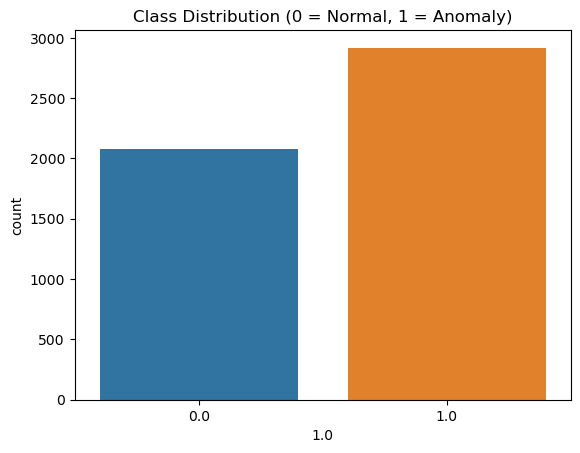

In [4]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_bal))

sns.countplot(x=y)
plt.title("Class Distribution (0 = Normal, 1 = Anomaly)")
plt.show()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled  = scaler.transform(X_test)

print(f"Training dataset shape: {X_train_scaled.shape}, Testing dataset shape: {X_test_scaled.shape}")


Training dataset shape: (4668, 140), Testing dataset shape: (1000, 140)


In [6]:

input_dim = X_train_scaled.shape[1]
print(f"Input dimension: {input_dim}")


Input dimension: 140


In [7]:
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),

    # Encoder
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(16, activation="tanh"),

    # Decoder
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid")  
])


In [8]:
autoencoder.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

autoencoder.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          18,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 140)                 │          18,060 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,812 (214.11 KB)

 Trainable params: 54,812 (214.11 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0251 - mae: 0.1320 - val_loss: 0.0136 - val_mae: 0.0865
Epoch 2/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mae: 0.0794 - val_loss: 0.0101 - val_mae: 0.0713
Epoch 3/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mae: 0.0691 - val_loss: 0.0077 - val_mae: 0.0613
Epoch 4/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mae: 0.0563 - val_loss: 0.0053 - val_mae: 0.0486
Epoch 5/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mae: 0.0471 - val_loss: 0.0048 - val_mae: 0.0454
Epoch 6/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mae: 0.0433 - val_loss: 0.0043 - val_mae: 0.0428
Epoch 7/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mae: 0.0411 - val_loss: 0.0038 - val_mae: 0.0402
Epoch 8/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - mae: 0.0387 - val_loss: 0.0034 - val_mae: 0.0387
Epoch 9/25
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - mae:

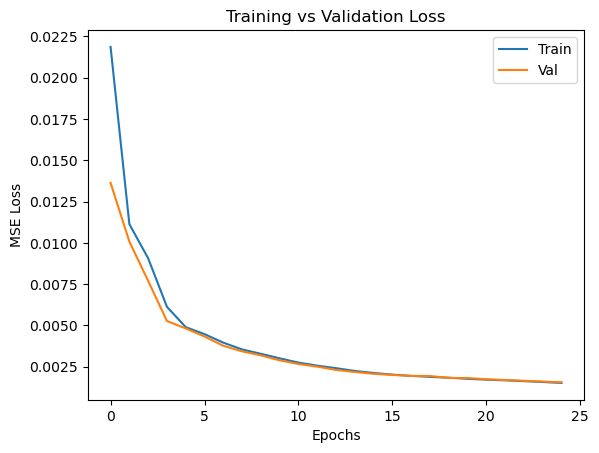

In [10]:
history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    validation_data=(X_test_scaled, X_test_scaled),
    epochs=25, batch_size=256, verbose=1
)

plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


In [11]:
# Predictions
X_train_pred = autoencoder.predict(X_train_scaled)
X_test_pred  = autoencoder.predict(X_test_scaled)

# Reconstruction error (MSE per sample)
train_errors = np.mean((X_train_scaled - X_train_pred) ** 2, axis=1)
test_errors  = np.mean((X_test_scaled - X_test_pred) ** 2, axis=1)

# Anomaly threshold
threshold = train_errors.mean() + train_errors.std()
print(f"Reconstruction Threshold: {threshold:.4f}")


146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Reconstruction Threshold: 0.0042


Accuracy: 0.41
Precision: 0.46
Recall: 0.04
F1 Score: 0.08


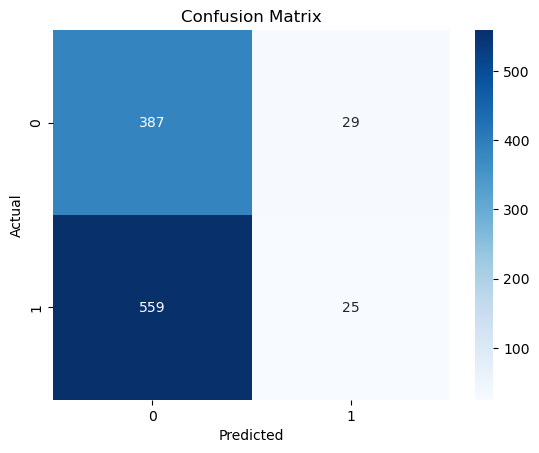

In [17]:
# Predict anomalies
y_pred = (test_errors > threshold).astype(int)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()